<a href="https://colab.research.google.com/github/DevikaSreemon/Apziva-project-1--HappyCustomer/blob/main/Happy_Customers_upd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install lazypredict

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 5.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cudnn-cu12==8.9.2.26; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requ

In [ ]:
!pip install vecstack

  Preparing metadata (setup.py) ... done
  Created wheel for vecstack: filename=vecstack-0.4.0-py3-none-any.whl size=19860 sha256=682e34a655b114f617786a80a198d676cb8cf17975ca22a16d0e94487499fee9
  Stored in directory: /root/.cache/pip/wheels/b8/d8/51/3cf39adf22c522b0a91dc2208db4e9de4d2d9d171683596220
Successfully built vecstack


# Happy Customer

Background:

We are one of the fastest growing startups in the logistics and delivery domain. We work with several partners and make on-demand delivery to our customers. During the COVID-19 pandemic, we are facing several different challenges and everyday we are trying to address these challenges.

We thrive on making our customers happy. As a growing startup, with a global expansion strategy we know that we need to make our customers happy and the only way to do that is to measure how happy each customer is. If we can predict what makes our customers happy or unhappy, we can then take necessary actions.

Getting feedback from customers is not easy either, but we do our best to get constant feedback from our customers. This is a crucial function to improve our operations across all levels.

We recently did a survey to a select customer cohort. You are presented with a subset of this data. We will be using the remaining data as a private test set.

Data Description:

Y = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers
X1 = my order was delivered on time
X2 = contents of my order was as I expected
X3 = I ordered everything I wanted to order
X4 = I paid a good price for my order
X5 = I am satisfied with my courier
X6 = the app makes ordering easy for me

Attributes X1 to X6 indicate the responses for each question and have values from 1 to 5 where the smaller number indicates less and the higher number indicates more towards the answer.

Goal(s):

Predict if a customer is happy or not based on the answers they give to questions asked.

Success Metrics:

Reach 73% accuracy score or above, or convince us why your solution is superior. We are definitely interested in every solution and insight you can provide us.

Try to submit your working solution as soon as possible. The sooner the better.

Bonus(es):

We are very interested in finding which questions/features are more important when predicting a customer’s happiness. Using a feature selection approach show us understand what is the minimal set of attributes/features that would preserve the most information about the problem while increasing predictability of the data we have. Is there any question that we can remove in our next survey?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir("/content/drive/My Drive/ApzivaProjects")

# Importing dataset
path = r'ACME-HappinessSurvey2020.csv'
customer_data = pd.read_csv(f"{path}")

customer_data

Mounted at /content/drive


,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5
...,...,...,...,...,...,...,...
121,1,5,2,3,4,4,3
122,1,5,2,3,4,2,5
123,1,5,3,3,4,4,5
124,0,4,3,3,4,4,5


In [ ]:
# rename the columns
data = customer_data.rename(columns = {'Y': 'happiness', 'X1':'on_time_delivery', 'X2':'contents_of_order', 'X3':'ordered_everything', 'X4': 'good_price_paid', 'X5':'courier_satisfaction', 'X6': 'easy_ordering_app'})

### Descriptive Analysis

In [ ]:
data.describe()

,happiness,on_time_delivery,contents_of_order,ordered_everything,good_price_paid,courier_satisfaction,easy_ordering_app
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


### Correlation between Variables

In [ ]:
#Get correlation between the variables
corr = data.corr(numeric_only = True)
corr.style.background_gradient(cmap='YlOrRd')

,happiness,on_time_delivery,contents_of_order,ordered_everything,good_price_paid,courier_satisfaction,easy_ordering_app
happiness,1.000000,0.280160,-0.024274,0.150838,0.064415,0.224522,0.167669
on_time_delivery,0.280160,1.000000,0.059797,0.283358,0.087541,0.432772,0.411873
contents_of_order,-0.024274,0.059797,1.000000,0.184129,0.114838,0.039996,-0.062205
ordered_everything,0.150838,0.283358,0.184129,1.000000,0.302618,0.358397,0.203750
good_price_paid,0.064415,0.087541,0.114838,0.302618,1.000000,0.293115,0.215888
courier_satisfaction,0.224522,0.432772,0.039996,0.358397,0.293115,1.000000,0.320195
easy_ordering_app,0.167669,0.411873,-0.062205,0.203750,0.215888,0.320195,1.000000


### Plotting the variables

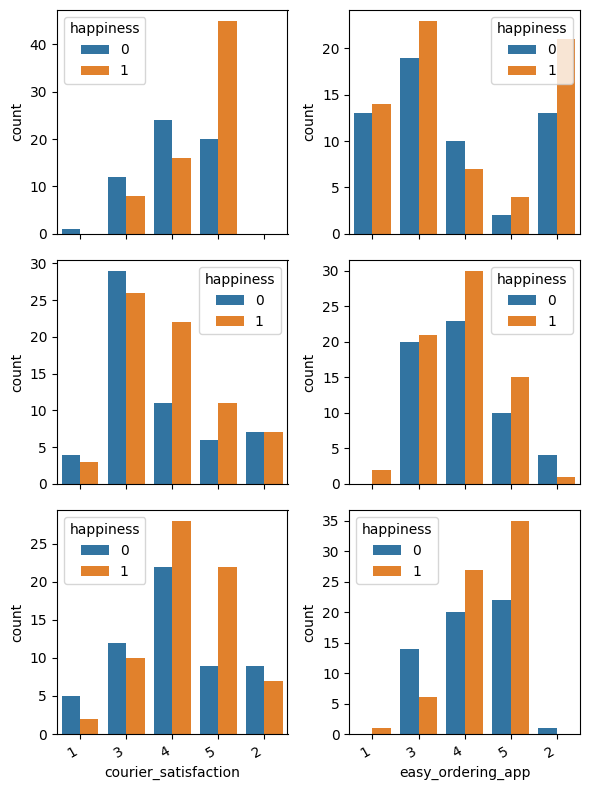

In [ ]:
import warnings
warnings.filterwarnings('ignore')

fig, axes = plt.subplots(3,2 , figsize=(6, 8), sharey=False, sharex=True)

# First plot for Variable X1 - my order was delivered on time
sns.countplot(x ='on_time_delivery', hue = "happiness", data = data, ax=axes[0, 0])

# Second plot for Variable X2 - contents of my order was as I expected
sns.countplot(x ='contents_of_order', hue = "happiness", data = data, ax=axes[0, 1])

# Third plot for Variable X3 = I ordered everything I wanted to order
sns.countplot(x ='ordered_everything', hue = "happiness", data = data, ax=axes[1, 0])

# Fourth plot for Variable X4 = I paid a good price for my order
sns.countplot(x ='good_price_paid', hue = "happiness", data = data, ax=axes[1, 1])

# Fifth plot for Variable X5 = I am satisfied with my courier
sns.countplot(x ='courier_satisfaction', hue = "happiness", data = data, ax=axes[2, 0])

# Sixth plot for Variable X6 = the app makes ordering easy for me
sns.countplot(x ='easy_ordering_app', hue = "happiness", data = data, ax=axes[2, 1])

for ax in axes[2, :]:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')

fig.tight_layout()
plt.show()

### Plotting Output

<Axes: >

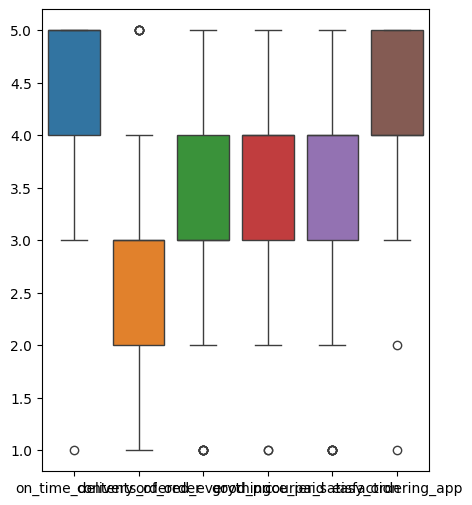

In [ ]:
#Boxplot for variables

variables = data[['on_time_delivery',	'contents_of_order',	'ordered_everything',	'good_price_paid',	'courier_satisfaction',	'easy_ordering_app']]
plt.figure(figsize=(5, 6))
sns.boxplot(variables)

<Figure size 300x400 with 0 Axes>

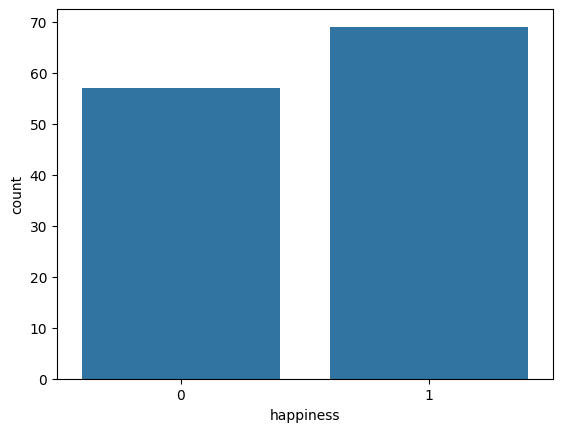

<Figure size 300x400 with 0 Axes>

In [ ]:
#Plot Output variable Y

sns.countplot(x ='happiness', data = data)
plt.figure(figsize=(3, 4))

### Split and Train data

In [ ]:
from sklearn.model_selection import train_test_split
import random
#seed = random.randint(1000,9999)
seed = 5516
# Assign the seed after experimenting
print(seed)

train, test = train_test_split(data, test_size=0.2, random_state=seed)
#train, val = train_test_split(train, test_size=0.2, random_state=seed)
X_train = train.drop(columns=['happiness'])
y_train = train['happiness']

#X_val = val.drop(columns=['Y'])
#y_val = val['Y']

X_test = test.drop(columns=['happiness'])
y_test = test['happiness']

print(f"Training set has {len(X_train)} samples")
print(f"Training set has {len(y_train)} samples")
#print(f"Validation set has {len(X_val)} samples")
#print(f"Validation set has {len(y_val)} samples")
print(f"Test set has {len(X_test)} samples")
print(f"Test set has {len(y_test)} samples")

5516
Training set has 100 samples
Training set has 100 samples
Test set has 26 samples
Test set has 26 samples


#### Lazy Predict Algorithm


In [ ]:

from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None, random_state=seed,)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

100%|██████████| 29/29 [00:01<00:00, 23.93it/s]

[LightGBM] [Info] Number of positive: 52, number of negative: 48
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000701 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 31
[LightGBM] [Info] Number of data points in the train set: 100, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.520000 -> initscore=0.080043
[LightGBM] [Info] Start training from score 0.080043
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

**Define Your Objective:**

Understand the primary goal of your model.
*   If you need to minimize false positives, the ROC AUC or Precision might be more important.
*   If you need to balance between false positives and false negatives, the F1 Score might be more suitable.


**Understand Each Metric:**

**Accuracy**: The ratio of correctly predicted instances to the total instances. Best for balanced datasets.

**Balanced Accuracy**: The average of recall obtained on each class. Useful for imbalanced datasets.

**ROC AUC**: Measures the ability of the classifier to distinguish between classes. A higher value indicates better performance.

**F1 Score**: The harmonic mean of Precision and Recall. Useful when you need to balance precision and recall.

**Time Taken**: The time required to train and predict with the model. Important for real-time or resource-constrained applications.


## Ranking Model

In [ ]:
df = pd.DataFrame(models)
#df = pd.DataFrame(data)

# Normalize the Time Taken (lower is better, so we invert the rank)
df['Time Taken'] = df['Time Taken'].max() - df['Time Taken']

# Rank the models for each metric
for metric in ['Accuracy', 'Balanced Accuracy', 'ROC AUC', 'F1 Score', 'Time Taken']:
    df[metric + '_Rank'] = df[metric].rank(ascending=False)

# Assign weights to each metric
weights = {
    'Accuracy': 0.1,
    'Balanced Accuracy': 0.2,
    'ROC AUC': 0.4,
    'F1 Score': 0.3,
    'Time Taken': 0.3
}

# Calculate the composite score
df['Composite_Score'] = sum(df[metric + '_Rank'] * weight for metric, weight in weights.items())

# Sort models by the composite score to get the best models
df = df.sort_values(by='Composite_Score')

# Select the top 3 models
top_3_models = df.head(3)
print(top_3_models)


                 Accuracy  Balanced Accuracy  ROC AUC  F1 Score  Time Taken  \
Model                                                                         
NearestCentroid      0.88               0.89     0.89      0.89        0.16   
BernoulliNB          0.81               0.80     0.80      0.81        0.16   
SGDClassifier        0.81               0.80     0.80      0.81        0.16   

                 Accuracy_Rank  Balanced Accuracy_Rank  ROC AUC_Rank  \
Model                                                                  
NearestCentroid           1.00                    1.00          1.00   
BernoulliNB               2.50                    2.50          2.50   
SGDClassifier             2.50                    2.50          2.50   

                 F1 Score_Rank  Time Taken_Rank  Composite_Score  
Model                                                             
NearestCentroid           1.00             8.00             3.40  
BernoulliNB               2.50            

#### Models

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, recall_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.neighbors import NearestCentroid

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


### Bernouli Naive Bayes

In [ ]:
bnb = BernoulliNB(binarize=0.0)
model = bnb.fit(X_train, y_train)
y_pred1 = bnb.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred1))
print('Training accuracy: {:.3f}'.format(accuracy_score(y_test,y_pred1)))


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.65      1.00      0.79        17

    accuracy                           0.65        26
   macro avg       0.33      0.50      0.40        26
weighted avg       0.43      0.65      0.52        26

Training accuracy: 0.654


### Bagging Classifier

In [ ]:
# Create the base classifier
dc = DecisionTreeClassifier()
model = BaggingClassifier(estimator=dc, n_estimators=10, random_state=seed)
classifiers = model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print('Training accuracy: {:.3f}'.format(accuracy_score(y_test,y_pred)))

Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.78      0.54         9
           1       0.78      0.41      0.54        17

    accuracy                           0.54        26
   macro avg       0.59      0.59      0.54        26
weighted avg       0.65      0.54      0.54        26

Training accuracy: 0.538


### LGBM Classifier

In [ ]:
# LGBM Classifier

clf = lgb.LGBMClassifier(random_state=seed)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print('Training Report\n {}'.format(classification_report(y_test, y_pred)))
print('Training accuracy: {:.3f}'.format(accuracy_score(y_test, y_pred)))

[LightGBM] [Info] Number of positive: 52, number of negative: 48
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000041 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 31
[LightGBM] [Info] Number of data points in the train set: 100, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.520000 -> initscore=0.080043
[LightGBM] [Info] Start training from score 0.080043
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

### Perceptron Model

In [ ]:

perceptron = Perceptron(max_iter=100, eta0=0.1, random_state=seed)
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)
print('Training accuracy: {:.3f}'.format(accuracy_score(y_test, y_pred)))

Classification Report:
               precision    recall  f1-score   support

           0       0.35      1.00      0.51         9
           1       0.00      0.00      0.00        17

    accuracy                           0.35        26
   macro avg       0.17      0.50      0.26        26
weighted avg       0.12      0.35      0.18        26

Training accuracy: 0.346


### SGD Classifier

In [ ]:

clf = SGDClassifier(loss='log_loss', alpha=0.01, max_iter=1000, random_state=seed,)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)
print('Training accuracy: {:.3f}'.format(accuracy_score(y_test, y_pred)))

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.67      0.71         9
           1       0.83      0.88      0.86        17

    accuracy                           0.81        26
   macro avg       0.79      0.77      0.78        26
weighted avg       0.80      0.81      0.80        26

Training accuracy: 0.808


### Extratree Classifier

In [ ]:
etf = ExtraTreesClassifier(n_estimators = 5, criterion ='entropy', max_features = 2, random_state=seed,)
etf.fit(X_train, y_train)
y_pred = etf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)
print('Training accuracy: {:.3f}'.format(accuracy_score(y_test, y_pred)))

Classification Report:
               precision    recall  f1-score   support

           0       0.31      0.44      0.36         9
           1       0.62      0.47      0.53        17

    accuracy                           0.46        26
   macro avg       0.46      0.46      0.45        26
weighted avg       0.51      0.46      0.47        26

Training accuracy: 0.462


### SVC Classifier

In [ ]:
svm = SVC(kernel="rbf", gamma=0.5, C=1.0, random_state=seed,)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)
print('Training accuracy: {:.3f}'.format(accuracy_score(y_test, y_pred)))

Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.56      0.50         9
           1       0.73      0.65      0.69        17

    accuracy                           0.62        26
   macro avg       0.59      0.60      0.59        26
weighted avg       0.64      0.62      0.62        26

Training accuracy: 0.615


### XGB Classifier

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=seed,)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)
print('Training accuracy: {:.3f}'.format(accuracy_score(y_test, y_pred)))

Classification Report:
               precision    recall  f1-score   support

           0       0.31      0.44      0.36         9
           1       0.62      0.47      0.53        17

    accuracy                           0.46        26
   macro avg       0.46      0.46      0.45        26
weighted avg       0.51      0.46      0.47        26

Training accuracy: 0.462


### Decision tree Classifier

In [ ]:
model = DecisionTreeClassifier(min_samples_split=4, random_state=seed,)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Training Report\n {}'.format(classification_report(y_test,y_pred)))
print('Training accuracy: {:.3f}'.format(accuracy_score(y_test,y_pred)))

Training Report
               precision    recall  f1-score   support

           0       0.36      0.56      0.43         9
           1       0.67      0.47      0.55        17

    accuracy                           0.50        26
   macro avg       0.51      0.51      0.49        26
weighted avg       0.56      0.50      0.51        26

Training accuracy: 0.500


### Random Forest

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=seed,)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Training Report\n {}'.format(classification_report(y_test,y_pred)))
print('Training accuracy: {:.3f}'.format(accuracy_score(y_test,y_pred)))

Training Report
               precision    recall  f1-score   support

           0       0.36      0.44      0.40         9
           1       0.67      0.59      0.62        17

    accuracy                           0.54        26
   macro avg       0.52      0.52      0.51        26
weighted avg       0.56      0.54      0.55        26

Training accuracy: 0.538


### Logistic Regression

In [ ]:
# fit logistic regression
lr = LogisticRegression(random_state=seed,)
lr.fit(X_train,y_train)

# predict on the test set and get the test accuracy:
y_pred = lr.predict(X_test)
print('Training Report\n {}'.format(classification_report(y_test, y_pred)))
print('Training accuracy: {:.3f}'.format(accuracy_score(y_test, y_pred)))

Training Report
               precision    recall  f1-score   support

           0       0.62      0.56      0.59         9
           1       0.78      0.82      0.80        17

    accuracy                           0.73        26
   macro avg       0.70      0.69      0.69        26
weighted avg       0.72      0.73      0.73        26

Training accuracy: 0.731


### NearestCentroid

In [ ]:
nc = NearestCentroid()
model = nc.fit(X_train, y_train)
y_pred1 = nc.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred1))
print('Training accuracy: {:.3f}'.format(accuracy_score(y_test,y_pred1)))

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.78      0.78         9
           1       0.88      0.88      0.88        17

    accuracy                           0.85        26
   macro avg       0.83      0.83      0.83        26
weighted avg       0.85      0.85      0.85        26

Training accuracy: 0.846


### Logistic Regression with L1 Regularisation

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C= 100, penalty= 'l1', solver='liblinear')
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print("Non Zero weights:",np.count_nonzero(clf.coef_))


Non Zero weights: 6


In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C= 0.1, penalty= 'l1', solver='liblinear')
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print("Non Zero weights:",np.count_nonzero(clf.coef_))


Non Zero weights: 1


In [ ]:
clf = LogisticRegression(C= 0.0001, penalty= 'l1', solver='liblinear')
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print("Non Zero weights:",np.count_nonzero(clf.coef_))
# Predit accuracy
print('Training Report\n {}'.format(classification_report(y_test, pred)))
print('Training accuracy: {:.3f}'.format(accuracy_score(y_test, pred)))

Non Zero weights: 0
Training Report
               precision    recall  f1-score   support

           0       0.35      1.00      0.51         9
           1       0.00      0.00      0.00        17

    accuracy                           0.35        26
   macro avg       0.17      0.50      0.26        26
weighted avg       0.12      0.35      0.18        26

Training accuracy: 0.346


#### From experimenting different model we can conclude that **Nearest Centroid** has got good accuracies as 84% also with better recall percentage of78%.

### 1. Voting Ensemble Method using LGBM Classifier


In [ ]:
# importing voting classifier
from sklearn.ensemble import VotingClassifier

# initializing all the model objects with default parameters
model_1 = LogisticRegression()
model_2 = SGDClassifier(random_state=seed)
model_3 = NearestCentroid()

#model_4 = SVC(random_state=seed,)
#model_5 = BaggingClassifier(random_state=seed)
#model_6 = lgb.LGBMClassifier(random_state=seed)
#model_7 = XGBClassifier(random_state=seed)

# Making the final model using voting classifier
final_model = VotingClassifier(
    estimators=[('lr', model_1), ('sgd', model_2), ('nc', model_3)] , voting='hard')

#estimators=[('lr', model_1), ('sgd', model_2), ('svc', model_3), ('nc', model_4), ('bag', model_5), ('lgb', model_5), ('xgb', model_5)] , voting='hard')

# training all the model on the train dataset
final_model.fit(X_train, y_train)


# predicting the output on the test dataset
pred_final = final_model.predict(X_test)

print('Training Report\n {}'.format(classification_report(y_test, pred_final)))
print('Training accuracy: {:.3f}'.format(accuracy_score(y_test, pred_final)))


Training Report
               precision    recall  f1-score   support

           0       0.70      0.78      0.74         9
           1       0.88      0.82      0.85        17

    accuracy                           0.81        26
   macro avg       0.79      0.80      0.79        26
weighted avg       0.81      0.81      0.81        26

Training accuracy: 0.808


### 2. Stacking Ensemble Method



In [ ]:
# importing stacking lib
from vecstack import stacking

# initializing all the model objects with default parameters
model_1 = LogisticRegression()
model_2 = SGDClassifier(random_state=seed)
model_3 = NearestCentroid()

# putting all base model objects in one list
all_models = [model_1, model_2, model_3]

# Ensure y_train is a 1D array
y_train = y_train.ravel()

# computing the stack features
s_train, s_test = stacking(all_models,
                           X_train.values, # Convert X_train to numpy array
                           y_train,
                           X_test.values, # Convert X_test to numpy array
                           regression=True,
                           n_folds=4,
                           shuffle=True, # Enable shuffling for KFold
                           random_state=seed, # Now you can set a random state
                          )

# initializing the second-level model
final_model = model_3

# fitting the second level model with stack features
final_model = final_model.fit(X_train, y_train)

# predicting the final output using stacking
pred_final = final_model.predict(X_test)

print('Training Report\n {}'.format(classification_report(y_test, pred_final)))
print('Training accuracy: {:.3f}'.format(accuracy_score(y_test, pred_final)))

Training Report
               precision    recall  f1-score   support

           0       0.78      0.78      0.78         9
           1       0.88      0.88      0.88        17

    accuracy                           0.85        26
   macro avg       0.83      0.83      0.83        26
weighted avg       0.85      0.85      0.85        26

Training accuracy: 0.846


### Feature importance using Nearest Centroid

In [ ]:
# Initialize and train the nearest centroid model
clf = NearestCentroid()
rf1 = clf.fit(X_train, y_train)

# Baseline accuracy with all features
y_pred = clf.predict(X_test)
baseline_accuracy = accuracy_score(y_test, y_pred)

# Function to calculate feature importance
def calculate_feature_importance(X_train, y_train, X_test, y_test, feature_names):
    n_features = X_train.shape[1]
    feature_importance = []

    for i in range(n_features):
        # Remove one feature (leave-one-feature-out)
        X_train_reduced = np.delete(X_train, i, axis=1)
        X_test_reduced = np.delete(X_test, i, axis=1)

        # Train the model with the reduced feature set
        clf_reduced = NearestCentroid()
        clf_reduced.fit(X_train_reduced, y_train)

        # Predict and calculate accuracy
        y_pred_reduced = clf_reduced.predict(X_test_reduced)
        accuracy_reduced = accuracy_score(y_test, y_pred_reduced)

        # Calculate the drop in accuracy
        accuracy_drop = baseline_accuracy - accuracy_reduced
        feature_importance.append((feature_names[i], accuracy_drop))

  # Sort features by importance
    feature_importance.sort(key=lambda x: x[1], reverse=True)
    return feature_importance

# Get feature names from X_train (assuming it's a pandas DataFrame)
feature_names = X_train.columns

# Calculate feature importance
importance = calculate_feature_importance(X_train, y_train, X_test, y_test, feature_names)

# Print the ranked feature importance
print("\nFeature importance (ranked):")
for feature, importance_value in importance:
    print(f"{feature}: {importance_value:.4f}")




Feature importance (ranked):
on_time_delivery: 0.0769
courier_satisfaction: 0.0769
contents_of_order: 0.0000
easy_ordering_app: 0.0000
ordered_everything: -0.0385
good_price_paid: -0.0385


In [ ]:
from sklearn.neighbors import NearestCentroid
from sklearn.inspection import permutation_importance
import numpy as np

# Initialize and fit the NearestCentroid model
model = NearestCentroid()
model.fit(X_train, y_train)

# Calculate permutation importance
perm_importance = permutation_importance(model, X_train, y_train, n_repeats=10, random_state=seed)

# Get the importances and sort them
sorted_importances = np.argsort(perm_importance.importances_mean)

# Print sorted importances (indices)
print("Sorted feature importances:", sorted_importances)

# Select the top 4 most important features
selected_features = sorted_importances[-4:]  # Select the indices of the top 4 features

print("Selected feature indices:", selected_features)

# Map indices to feature names
sorted_feature_names = feature_names[sorted_importances]
selected_feature_names = feature_names[selected_features]

# Print sorted features with their indices
print("\nSorted feature importances with names:")
for idx in sorted_importances:
    print(f"Feature: {feature_names[idx]}, Importance Rank: {idx}")

# Print selected top features with their names
print("\nSelected top 4 most important features:")
for idx in selected_features:
    print(f"Feature: {feature_names[idx]}")


Sorted feature importances: [0 3 5 4 1 2]
Selected feature indices: [5 4 1 2]

Sorted feature importances with names:
Feature: on_time_delivery, Importance Rank: 0
Feature: good_price_paid, Importance Rank: 3
Feature: easy_ordering_app, Importance Rank: 5
Feature: courier_satisfaction, Importance Rank: 4
Feature: contents_of_order, Importance Rank: 1
Feature: ordered_everything, Importance Rank: 2

Selected top 4 most important features:
Feature: easy_ordering_app
Feature: courier_satisfaction
Feature: contents_of_order
Feature: ordered_everything


### Modelling after removing Variables

In [ ]:
X_train_rfe1 = X_train.drop(columns=['good_price_paid'])
X_test_rfe1 = X_test.drop(columns=['good_price_paid'])


# Nearest Centroid

nc = NearestCentroid()
nc.fit(X_train_rfe1, y_train)
y_pred = nc.predict(X_test_rfe1)
print('Training Report\n {}'.format(classification_report(y_test,y_pred)))
print('Training accuracy: {:.3f}'.format(accuracy_score(y_test,y_pred)))

Training Report
               precision    recall  f1-score   support

           0       0.80      0.89      0.84         9
           1       0.94      0.88      0.91        17

    accuracy                           0.88        26
   macro avg       0.87      0.89      0.88        26
weighted avg       0.89      0.88      0.89        26

Training accuracy: 0.885


In [ ]:
X_train_rfe2 = X_train.drop(columns=['contents_of_order'])
X_test_rfe2 = X_test.drop(columns=['contents_of_order'])


# Nearest Centroid

nc = NearestCentroid()
nc.fit(X_train_rfe2, y_train)
y_pred = nc.predict(X_test_rfe2)
print('Training Report\n {}'.format(classification_report(y_test,y_pred)))
print('Training accuracy: {:.3f}'.format(accuracy_score(y_test,y_pred)))

Training Report
               precision    recall  f1-score   support

           0       0.78      0.78      0.78         9
           1       0.88      0.88      0.88        17

    accuracy                           0.85        26
   macro avg       0.83      0.83      0.83        26
weighted avg       0.85      0.85      0.85        26

Training accuracy: 0.846


In [ ]:
X_train_rfe3 = X_train.drop(columns=['ordered_everything'])
X_test_rfe3 = X_test.drop(columns=['ordered_everything'])


# Nearest Centroid

nc = NearestCentroid()
nc.fit(X_train_rfe3, y_train)
y_pred = nc.predict(X_test_rfe3)
print('Training Report\n {}'.format(classification_report(y_test,y_pred)))
print('Training accuracy: {:.3f}'.format(accuracy_score(y_test,y_pred)))

Training Report
               precision    recall  f1-score   support

           0       0.80      0.89      0.84         9
           1       0.94      0.88      0.91        17

    accuracy                           0.88        26
   macro avg       0.87      0.89      0.88        26
weighted avg       0.89      0.88      0.89        26

Training accuracy: 0.885


In [ ]:
X_train_rfe4 = X_train.drop(columns=['good_price_paid', 'ordered_everything'])
X_test_rfe4 = X_test.drop(columns=['good_price_paid', 'ordered_everything'])


# Nearest Centroid

nc = NearestCentroid()
nc.fit(X_train_rfe4, y_train)
y_pred = nc.predict(X_test_rfe4)
print('Training Report\n {}'.format(classification_report(y_test,y_pred)))
print('Training accuracy: {:.3f}'.format(accuracy_score(y_test,y_pred)))

Training Report
               precision    recall  f1-score   support

           0       0.78      0.78      0.78         9
           1       0.88      0.88      0.88        17

    accuracy                           0.85        26
   macro avg       0.83      0.83      0.83        26
weighted avg       0.85      0.85      0.85        26

Training accuracy: 0.846


In [ ]:
X_train_rfe5 = X_train.drop(columns=['contents_of_order', 'ordered_everything', 'good_price_paid'])
X_test_rfe5 = X_test.drop(columns=['contents_of_order', 'ordered_everything', 'good_price_paid'])


# Nearest Centroid

nc = NearestCentroid()
nc.fit(X_train_rfe5, y_train)
y_pred = nc.predict(X_test_rfe5)
print('Training Report\n {}'.format(classification_report(y_test,y_pred)))
print('Training accuracy: {:.3f}'.format(accuracy_score(y_test,y_pred)))

Training Report
               precision    recall  f1-score   support

           0       0.73      0.89      0.80         9
           1       0.93      0.82      0.87        17

    accuracy                           0.85        26
   macro avg       0.83      0.86      0.84        26
weighted avg       0.86      0.85      0.85        26

Training accuracy: 0.846


### Hyperparamter Tuning on Nearest Centroid

In [ ]:
## Hyper Parameter Optimization
param_grid = {
    'shrink_threshold': [None]
}

In [ ]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


In [ ]:
# Initialize the NearestCentroid model
model = NearestCentroid()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model using grid search
grid_search.fit(X_train_rfe5, y_train)

# Get the best model and hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best hyperparameters:", best_params)

# Get the feature names used during training
training_features = X_train_rfe5.columns

# Select only those features from X_test_rfe5
X_test_for_prediction = X_test_rfe5[training_features]

# Now predict using the subset of X_test_rfe5
y_pred = best_model.predict(X_test_for_prediction)


# Evaluate the model
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy on test data:", accuracy_score(y_test, y_pred))

Best hyperparameters: {'shrink_threshold': None}

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.89      0.80         9
           1       0.93      0.82      0.87        17

    accuracy                           0.85        26
   macro avg       0.83      0.86      0.84        26
weighted avg       0.86      0.85      0.85        26

Accuracy on test data: 0.8461538461538461


In [ ]:
# Initialize the NearestCentroid model
classifier = NearestCentroid()

# Initialize RandomizedSearchCV with cross-validation
random_search = RandomizedSearchCV(
    estimator=classifier,
    param_distributions=param_grid,
    n_iter=5,  # Number of parameter settings to try
    scoring='accuracy',  # You might use 'roc_auc' for binary classification
    n_jobs=-1,
    cv=5,
    verbose=3,
    random_state=seed
)

# Fit the model using random search
random_search.fit(X_train_rfe5, y_train)

# Get the best estimator
best_estimator = random_search.best_estimator_

# Print the best hyperparameters and the best score
print("Best Hyperparameters:", random_search.best_params_)
print("Best Cross-Validation Score:", random_search.best_score_)

# Get the feature names used during training
training_features = X_train_rfe5.columns

# Select only those features from X_test_rfe5
X_test_for_prediction = X_test_rfe5[training_features]

# Evaluate the best model on the test set (using the subset of X_test_rfe5)
test_accuracy = best_estimator.score(X_test_for_prediction, y_test)

y_pred = best_estimator.predict(X_test_for_prediction)

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy on test data:", accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Hyperparameters: {'shrink_threshold': None}
Best Cross-Validation Score: 0.51

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.89      0.80         9
           1       0.93      0.82      0.87        17

    accuracy                           0.85        26
   macro avg       0.83      0.86      0.84        26
weighted avg       0.86      0.85      0.85        26

Accuracy on test data: 0.8461538461538461


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 1 is smaller than n_iter=5. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


### Reference Code

In [ ]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.inspection import permutation_importance
from sklearn.neighbors import NearestCentroid

# Assuming seed is defined
seed = 42  # Example seed value

# Print initial shape
print(f"Initial X_train shape: {X_train.shape}")

# Initialize the NearestCentroid model
model = NearestCentroid()

# Fit the model to the entire dataset first (necessary for permutation importance)
model.fit(X_train, y_train)

# Define a custom importance getter
def custom_importance_getter(estimator):
    result = permutation_importance(estimator, X_train, y_train, n_repeats=10, random_state=seed)
    return result.importances_mean

# Initialize RFE to select 4 features out of 6
rfe = RFE(estimator=NearestCentroid(), n_features_to_select=5, step=1, importance_getter=custom_importance_getter)

# Fit RFE
rfe1 = rfe.fit(X_train, y_train)

# Transform the data
rfe_X_train = rfe.transform(X_train)

# Check shape after RFE
print(f"Shape after RFE: {rfe_X_train.shape}")

# Fit the model on the transformed dataset
model.fit(rfe_X_train, y_train)

# Get the ranking of the features
ranking = rfe1.ranking_
selected_features = pd.DataFrame({'Feature': X_train.columns, 'Ranking': ranking})
selected_features.sort_values(by='Ranking', inplace=True)

# Print the ranking of features
print("Feature Ranking using RFE with NearestCentroid:")
print(selected_features)

# Transform the test data using RFE
rfe_X_test = rfe.transform(X_test)


In [ ]:
# Feature extraction using SGDClassifier
sgd_clf = SGDClassifier(random_state=seed).fit(X_train, y_train)

# Explore feature importances using model coefficients
# Coefficients in SGDClassifier indicate feature importance
feature_importances = pd.DataFrame(sgd_clf.coef_.flatten(),
                                   index=X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

# Print sorted list of feature importances
feature_importances

from sklearn.feature_selection import RFE

rfe = RFE(sgd_clf,  n_features_to_select=3)
fit1 = rfe.fit(X_train, y_train)

rfe

selected_features = pd.DataFrame({'Feature':list(X_train.columns),'Ranking':fit1.ranking_})
selected_features.sort_values(by='Ranking')

,Feature,Ranking
1,contents_of_order,1
4,courier_satisfaction,1
5,easy_ordering_app,1
0,on_time_delivery,2
3,good_price_paid,3
2,ordered_everything,4
